# **CLUSTER ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the "Data" sheet
df= pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **Data Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [6]:
df.duplicated().sum()

np.int64(0)

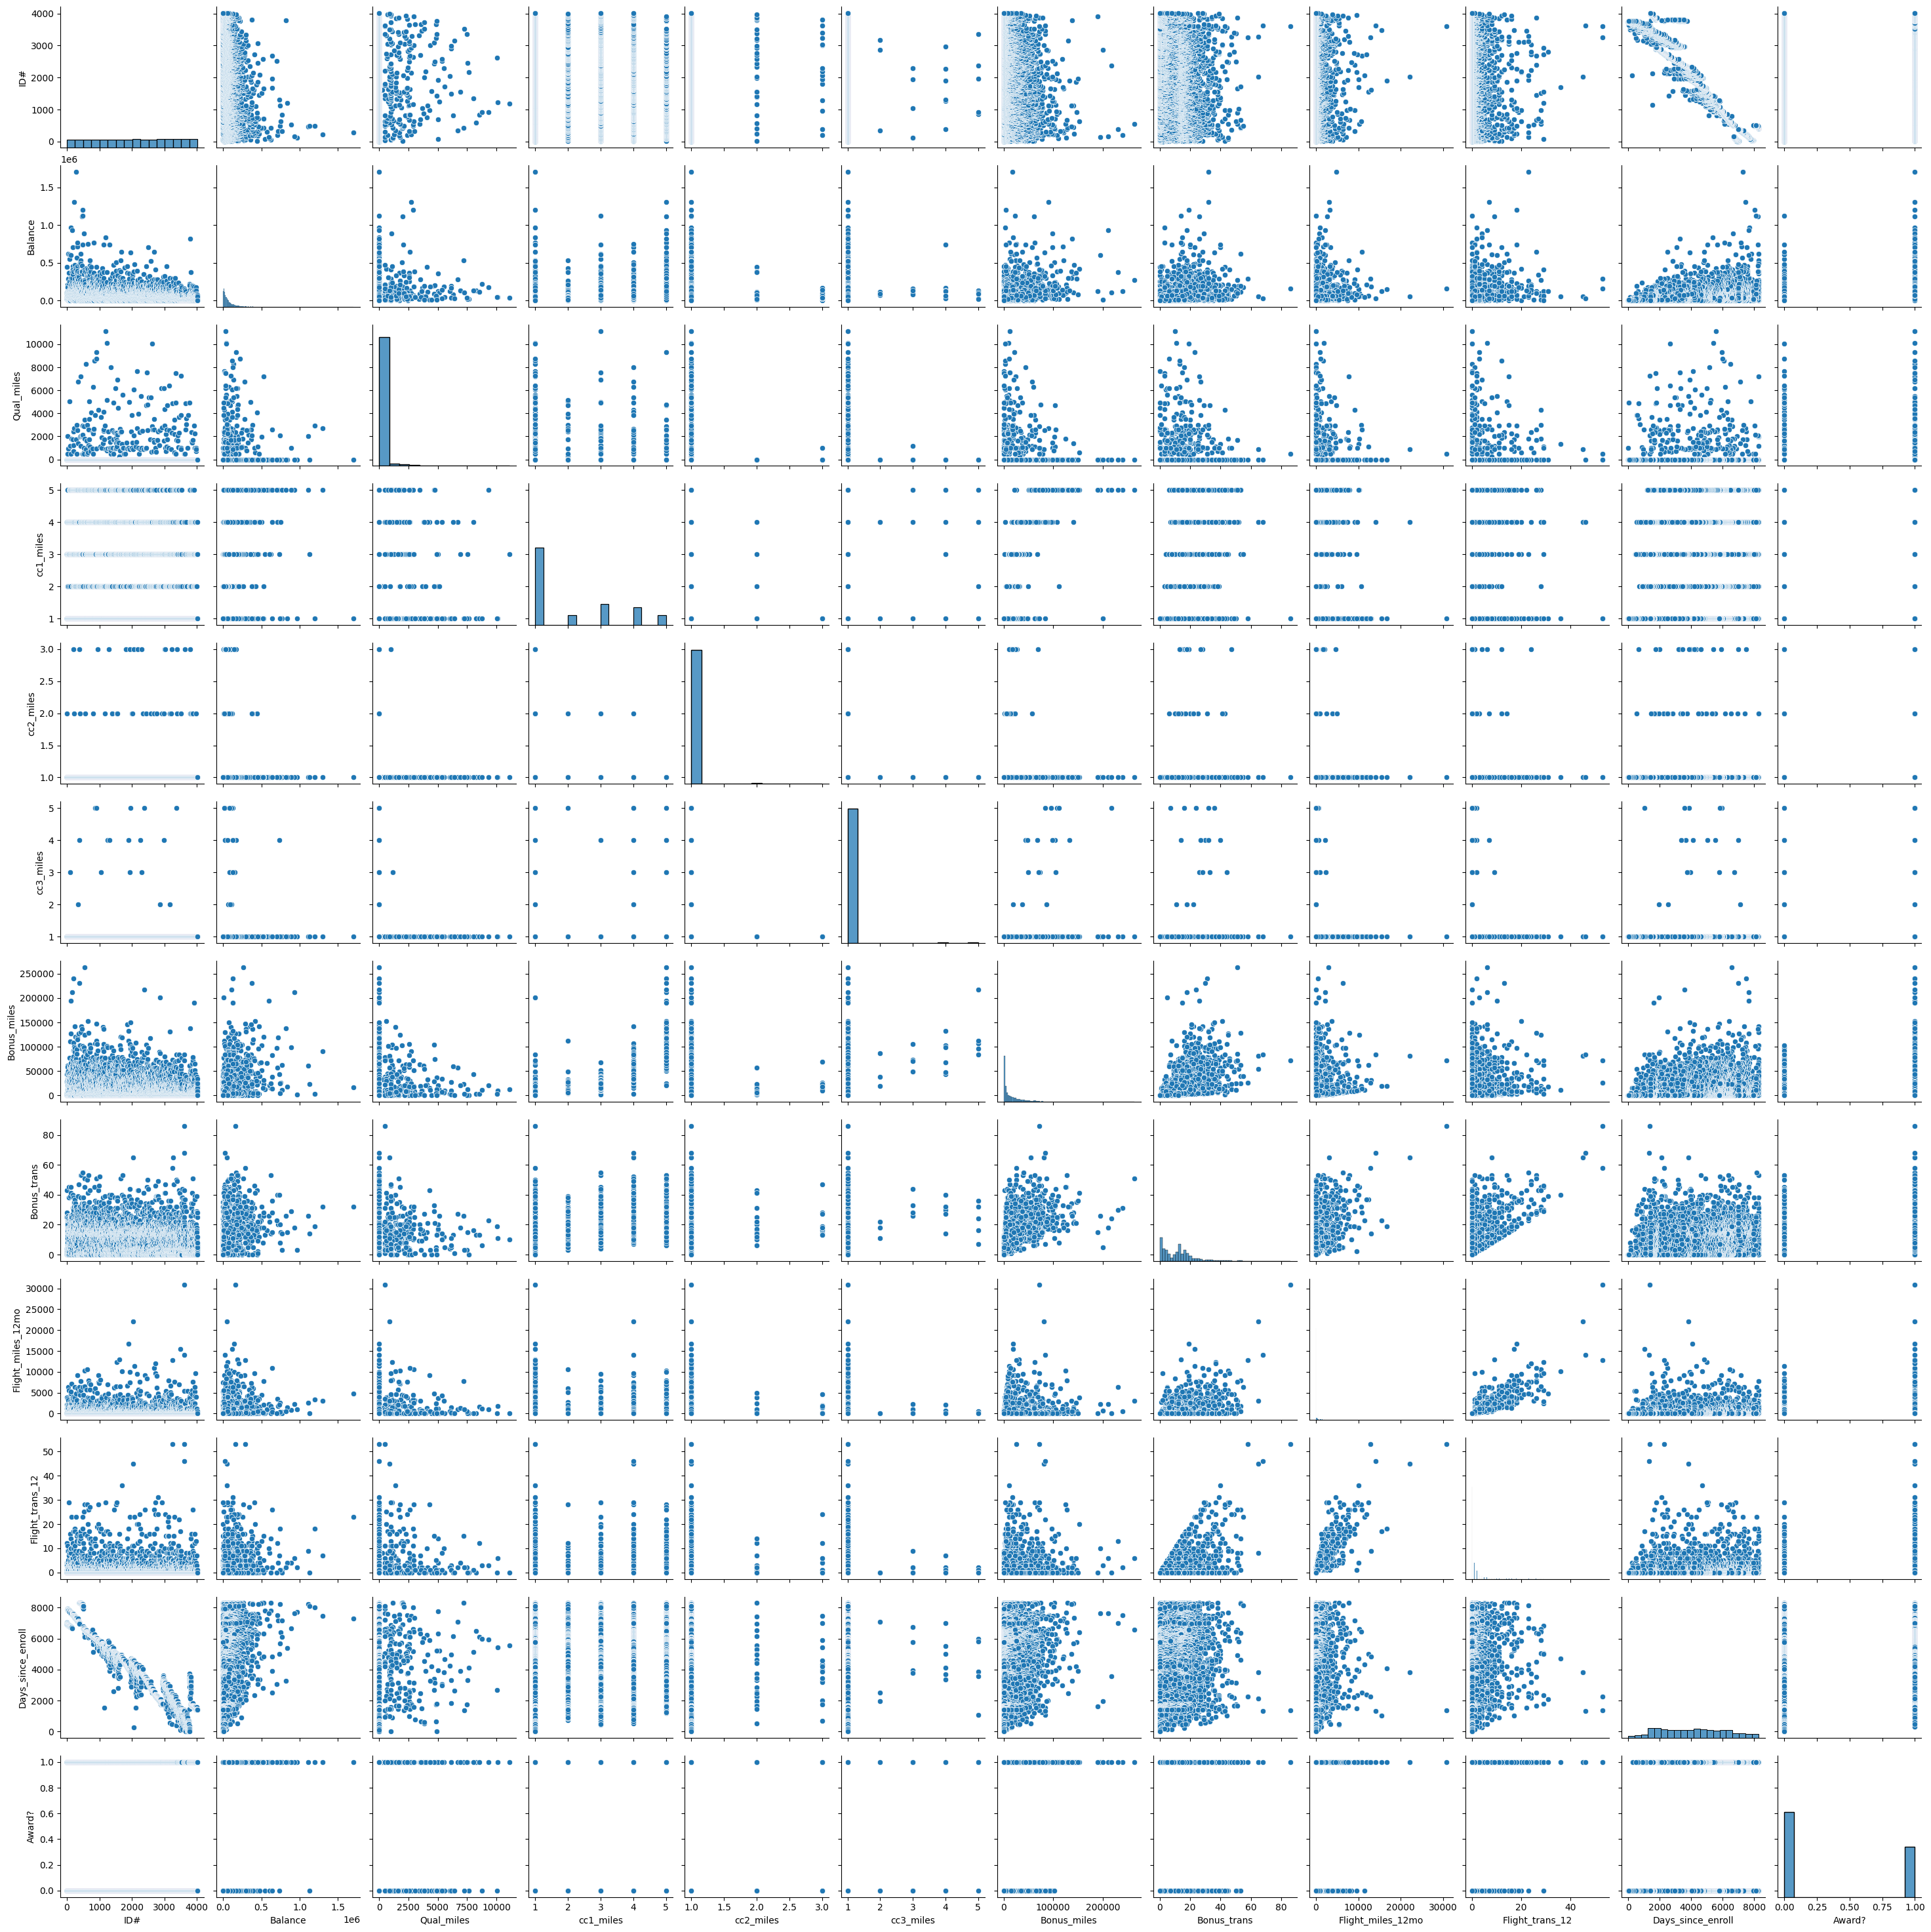

In [7]:
# Pair plot
sns.pairplot(df)
plt.show()

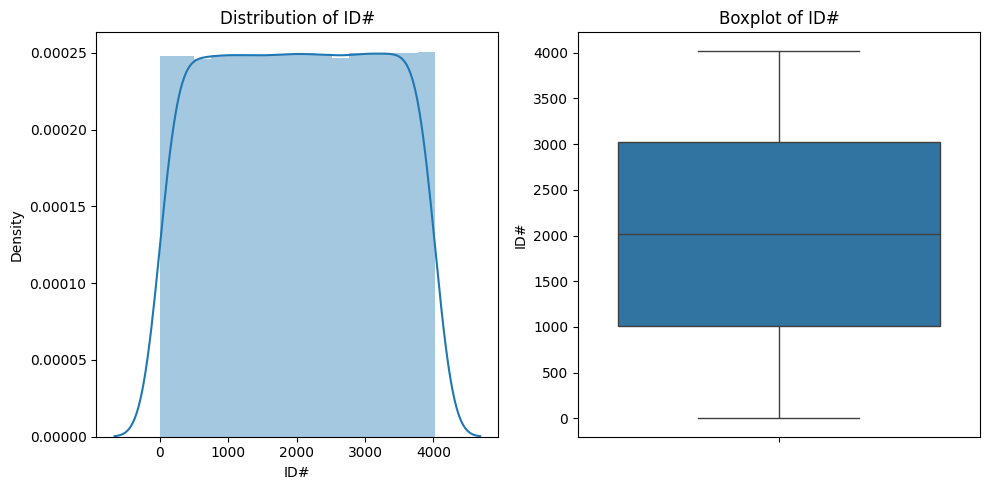

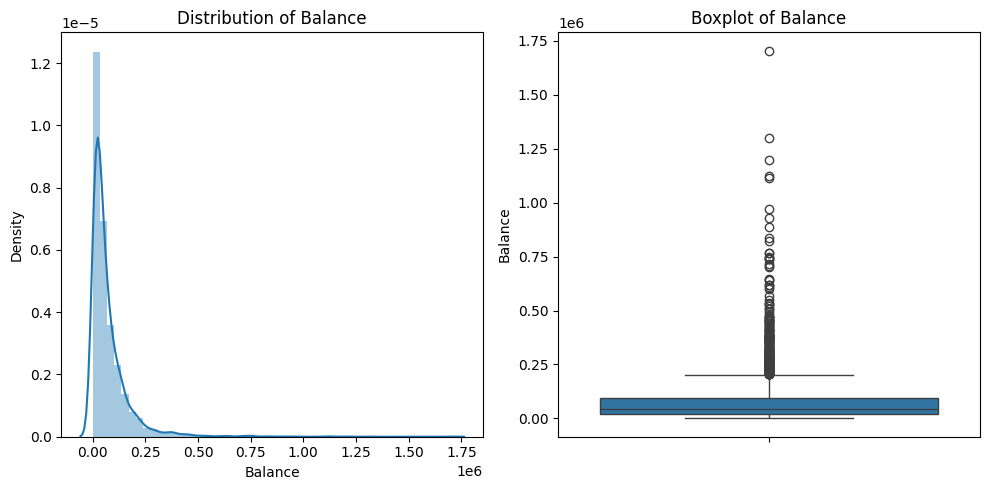

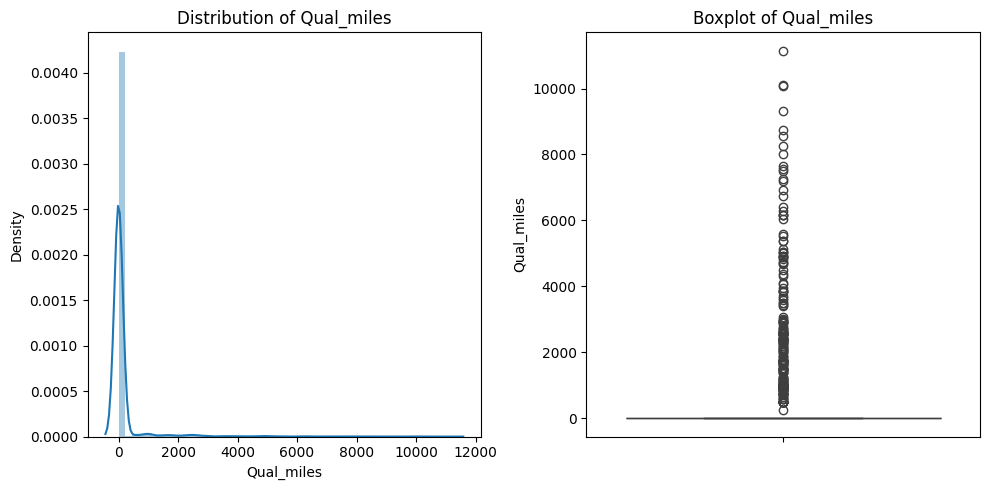

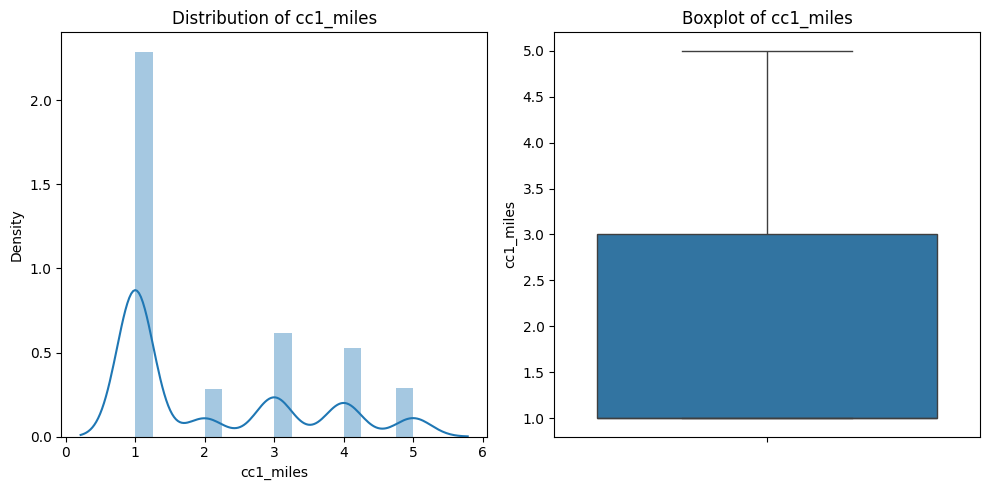

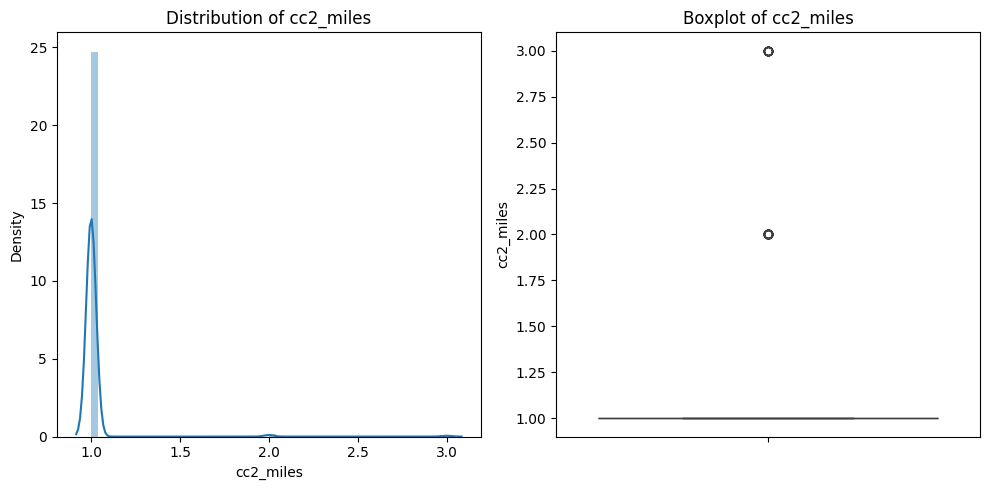

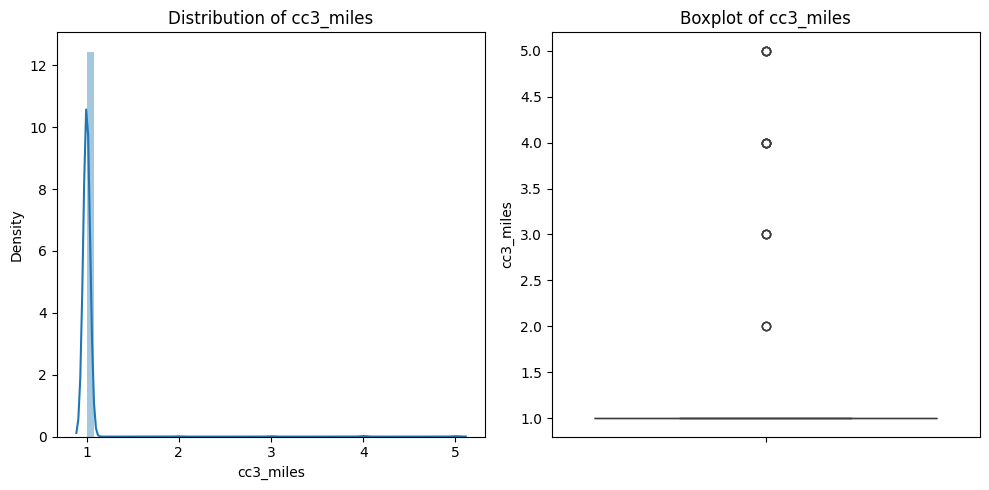

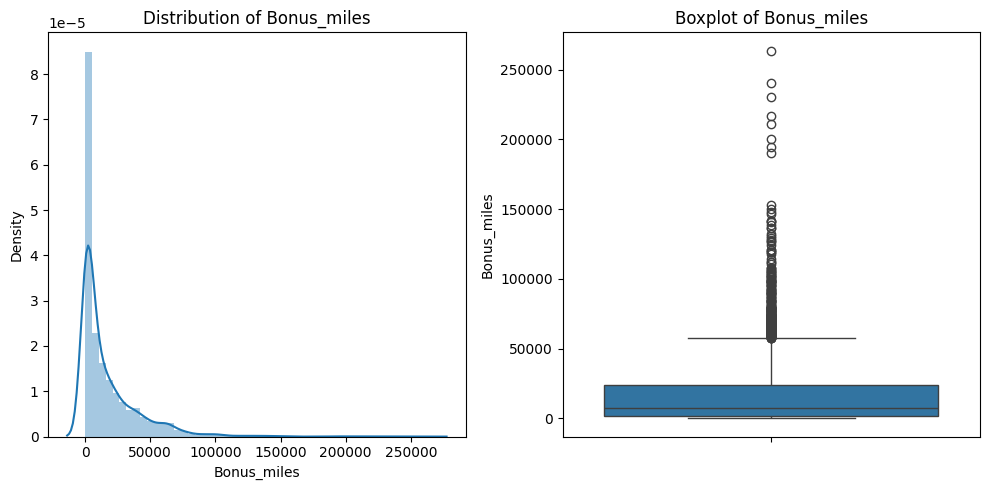

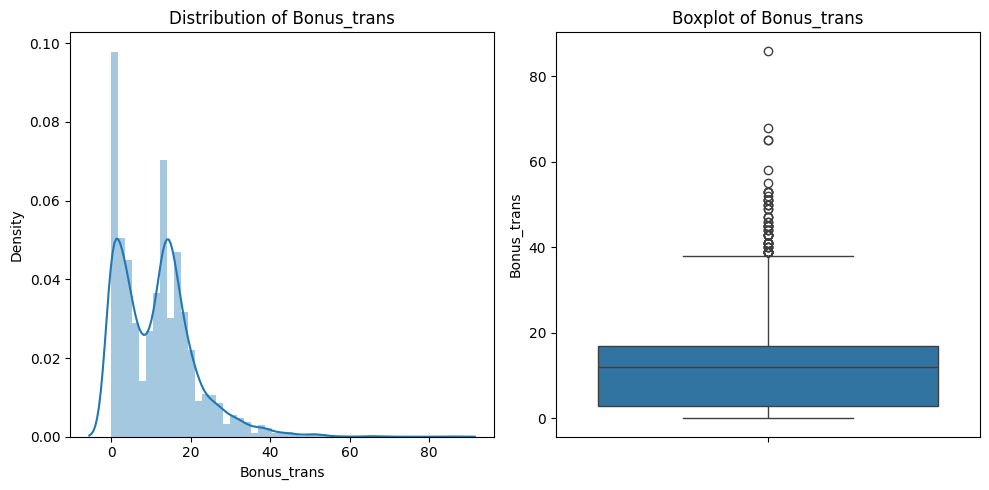

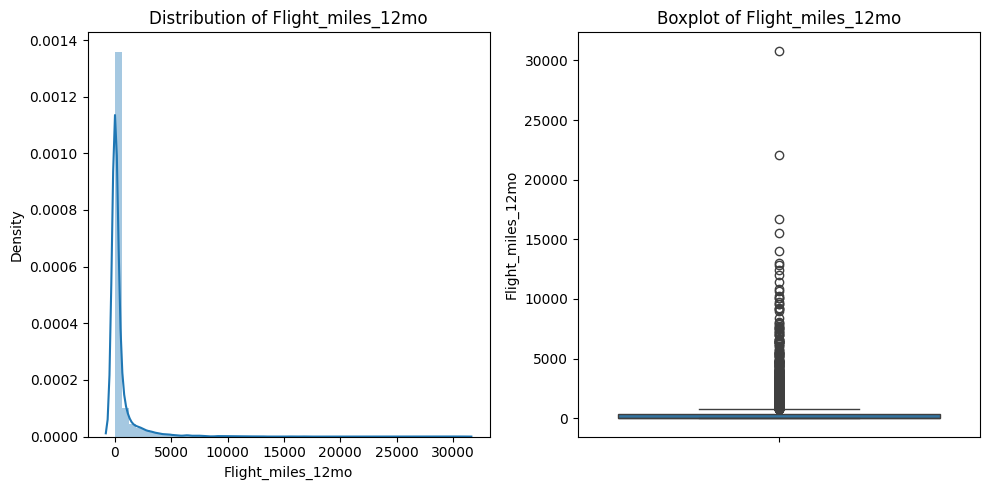

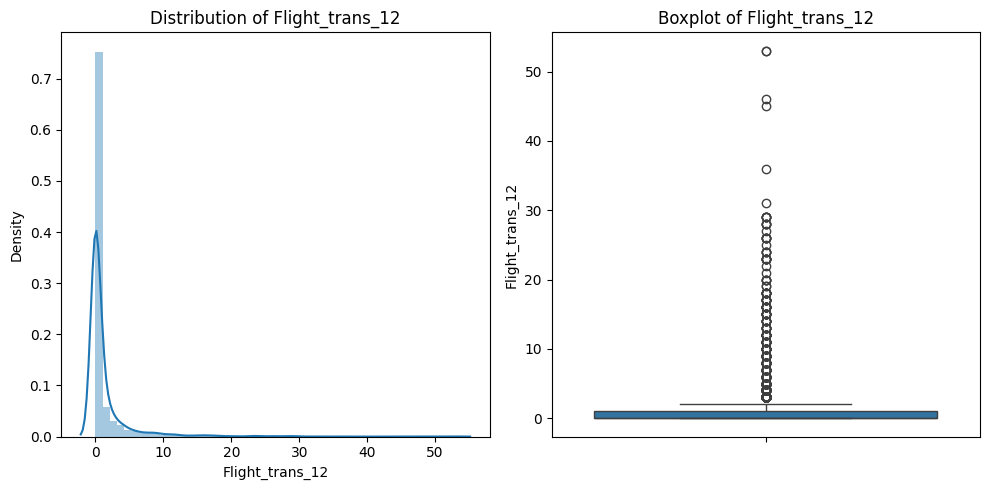

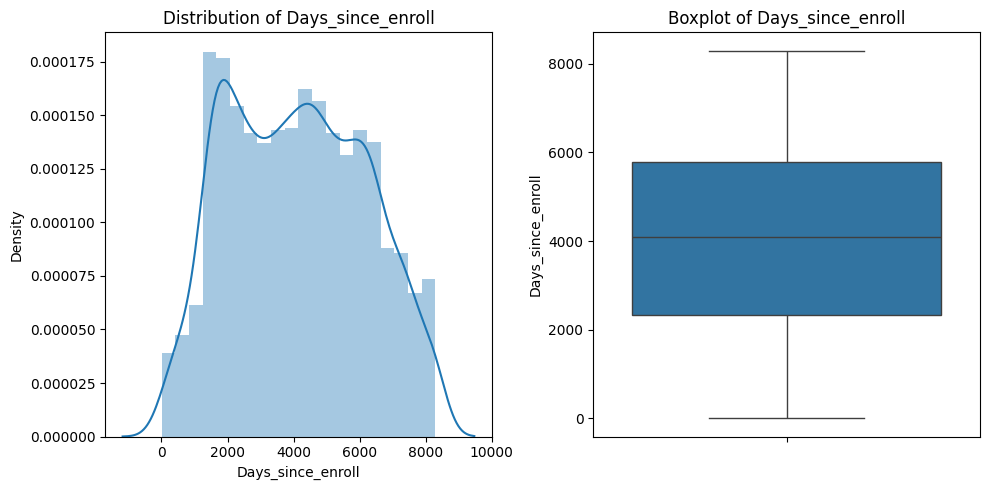

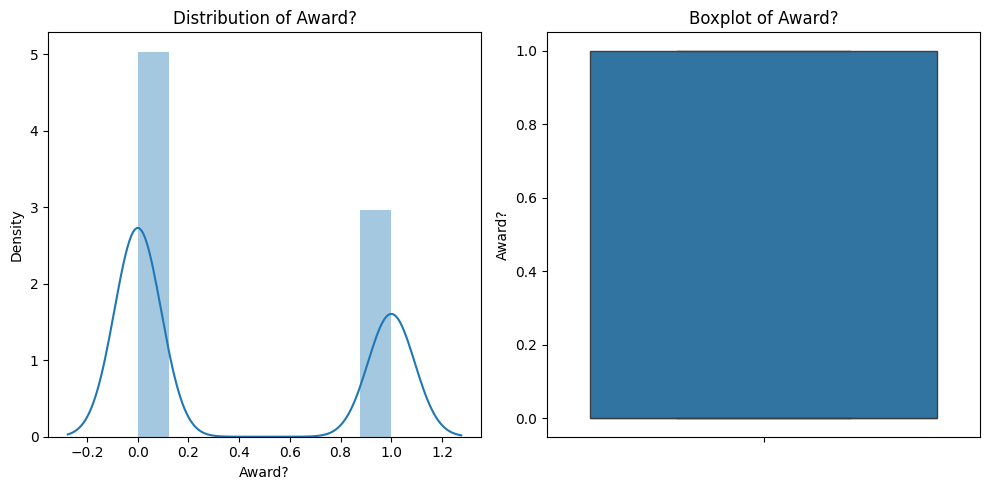

In [8]:
# Distplot and box plot
for col in df.columns:
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed

    # Distplot
    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])  # Use 'y=' for vertical boxplot
    plt.title(f'Boxplot of {col}')

    plt.tight_layout() # Adjust subplot parameters for a tight layout

In [9]:
#copying file
df1=df.copy()

In [10]:
df1.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
# Drop id column
df1 = df1.drop(['ID#'], axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
# standardize data using minmax

from sklearn.preprocessing import MinMaxScaler

# Assuming df2 is your DataFrame without outliers and unnecessary columns
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
numerical_cols = df1.select_dtypes(include=np.number).columns
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Now df2 contains the standardized data
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# **Hierarchical Clustering**

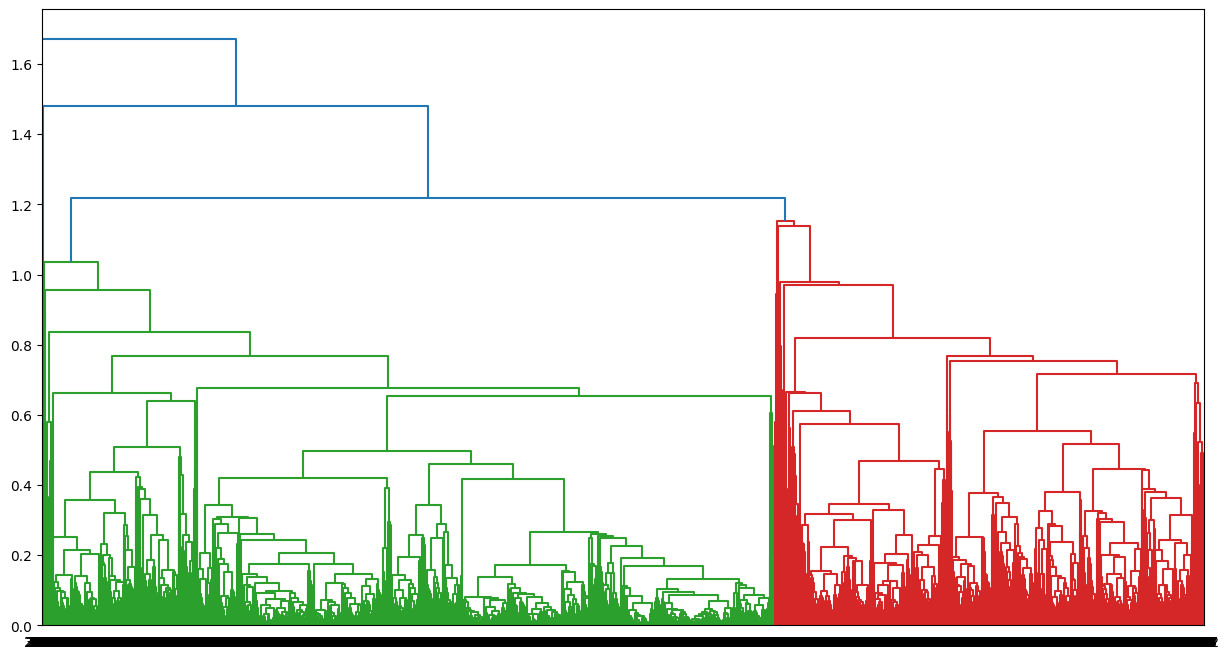

In [13]:
#Hierarchical Clustering using average
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

z=linkage(df1,method='average',metric='euclidean')
plt.figure(figsize=(15,8))
dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [14]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',metric = "euclidean").fit(df1)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df1['clust']=cluster_labels # creating a  new column and assigning it to new column
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [15]:
#grouping by cluster
cluster_means = df1.groupby('clust').mean()
cluster_means

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.056295,0.021580,0.414169,0.007834,0.000170,0.107487,0.180779,0.026094,0.046450,0.557646,1.0
1,0.035081,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0
3,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0
4,0.044910,0.013253,0.718750,0.000000,0.812500,0.437163,0.351744,0.019470,0.037736,0.618022,1.0


In [16]:
#  first 5 rows of cluster 0
cluster_0_rows = df1[df1['clust'] == 0].head(5)
cluster_0_rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,0
11,0.056617,0.0,1.00,0.0,0.0,0.231735,0.220930,0.000000,0.000000,0.834579,1.0,0


In [17]:
#  first 5 rows of cluster 1
cluster_0_rows = df1[df1['clust'] == 1].head(5)
cluster_0_rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0,1
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0,1
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0,1
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.0,0.0,0.837955,0.0,1
5,0.009631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836749,0.0,1


In [18]:
#  first 5 rows of cluster 2
cluster_0_rows = df1[df1['clust'] == 2].head(5)
cluster_0_rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
275,1.0,0.0,0.0,0.0,0.0,0.06488,0.372093,0.156505,0.433962,0.877864,1.0,2


In [19]:
#  first 5 rows of cluster 3
cluster_0_rows = df1[df1['clust'] == 3].head(5)
cluster_0_rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
3583,0.093917,0.044851,0.00,0.0,0.0,0.272879,1.000000,1.000000,1.000000,0.165300,1.0,3
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3


In [20]:
#  first 5 rows of cluster 4
cluster_0_rows = df1[df1['clust'] == 4].head(5)
cluster_0_rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
384,0.016537,0.000000,1.00,0.0,0.75,0.392347,0.372093,0.000000,0.000000,0.841331,1.0,4
850,0.015033,0.000000,0.75,0.0,1.00,0.406955,0.418605,0.019470,0.037736,0.719074,1.0,4
904,0.009288,0.000000,0.25,0.0,1.00,0.425398,0.186047,0.000000,0.000000,0.702074,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


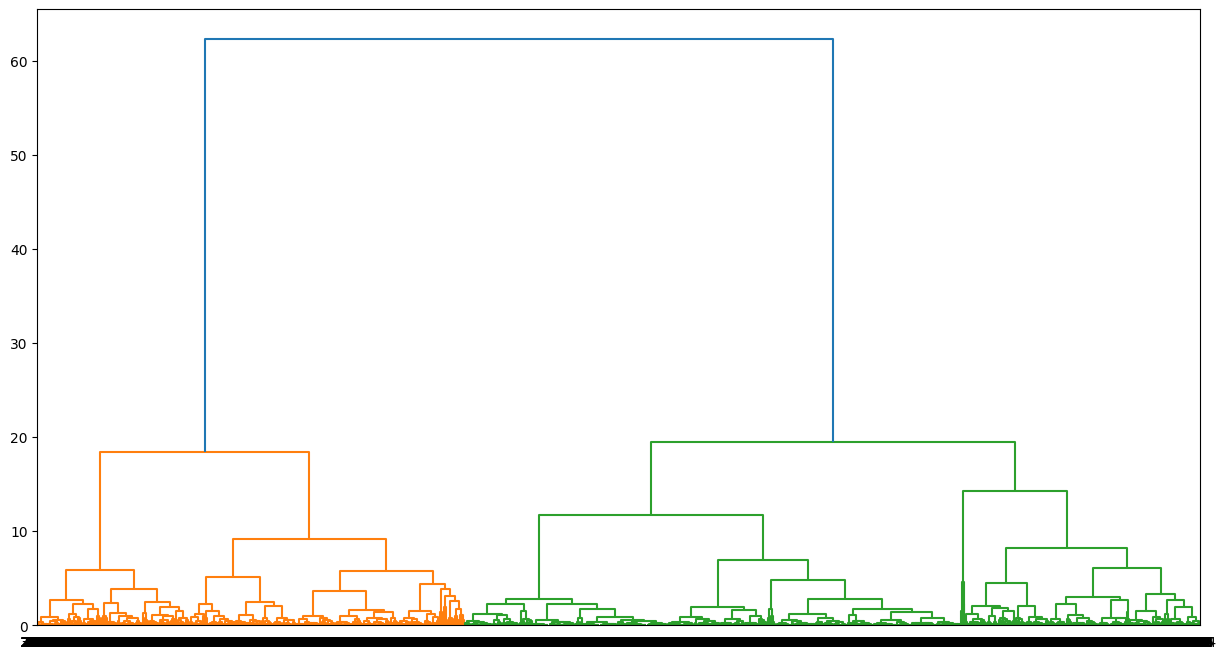

In [21]:
#Hierarchical Clustering using ward
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

z=linkage(df1,method='ward',metric='euclidean')
plt.figure(figsize=(15,8))
dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [22]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=8, linkage='ward',metric = "euclidean").fit(df1)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df1['clust']=cluster_labels # creating a  new column and assigning it to new column
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,6
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,5


In [23]:
#grouping by cluster
cluster_means = df1.groupby('clust').mean()
cluster_means

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.025406,0.001929,0.000000,0.016815,0.000247,0.009718,0.063660,0.005501,0.009873,0.595452,0.0
1,0.050141,0.016021,0.405288,0.000000,0.009615,0.061885,0.177080,0.005181,0.008636,0.506448,0.0
2,0.049509,0.033742,0.013339,0.019793,0.000000,0.028937,0.109294,0.034513,0.062027,0.534803,1.0
3,0.075209,0.014314,0.846080,0.000000,0.000478,0.218964,0.252946,0.027648,0.050326,0.613858,1.0
4,0.128384,0.017733,0.557692,0.000000,0.500000,0.350602,0.492844,0.223311,0.342525,0.529400,1.0
5,0.017605,0.008796,0.000000,0.000000,0.000000,0.009680,0.070949,0.011042,0.017896,0.188915,0.0
6,0.039951,0.012606,0.433379,0.000000,0.000000,0.072692,0.191190,0.010425,0.016017,0.513342,1.0
7,0.084269,0.011657,0.809896,0.001736,0.000868,0.169774,0.214107,0.008738,0.013954,0.562183,0.0


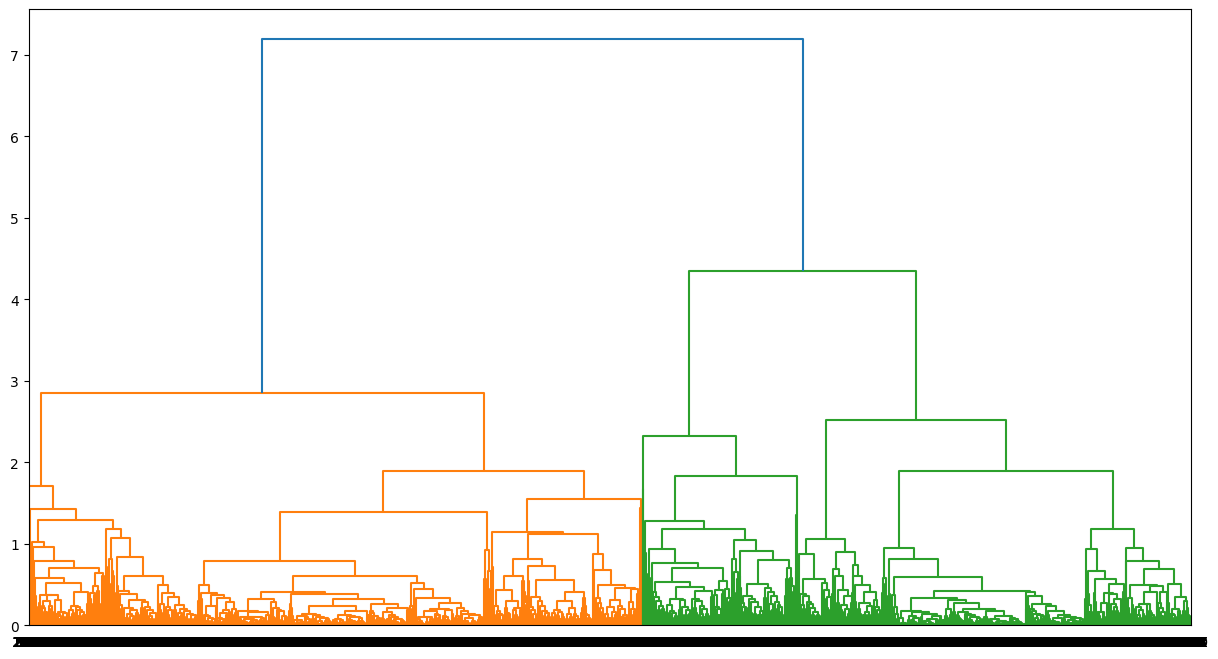

In [24]:
#Hierarchical Clustering using complete
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

z=linkage(df1,method='complete',metric='euclidean')
plt.figure(figsize=(15,8))
dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [25]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=6, linkage='complete',metric = "euclidean").fit(df1)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df1['clust']=cluster_labels # creating a  new column and assigning it to new column
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,3
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,3
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


In [26]:
#grouping by cluster
cluster_means = df1.groupby('clust').mean()
cluster_means

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.033808,0.006715,0.137655,0.011104,0.003429,0.027437,0.102183,0.005392,0.009452,0.565222,0.000000
1,0.074753,0.014298,0.844162,0.000000,0.012712,0.222251,0.254434,0.027524,0.050137,0.613921,1.000000
2,0.025257,0.010100,0.148401,0.000000,0.000000,0.031257,0.112122,0.010831,0.017253,0.300008,0.342427
3,0.049509,0.033742,0.013339,0.019793,0.000000,0.028937,0.109294,0.034513,0.062027,0.534803,1.000000
4,0.084269,0.011657,0.809896,0.001736,0.000868,0.169774,0.214107,0.008738,0.013954,0.562183,0.000000
5,0.261941,0.024901,0.300000,0.000000,0.000000,0.212105,0.718605,0.549456,0.830189,0.387605,1.000000


# **K-Means clustering**

In [27]:
#copying dataset
df2=df.copy()
df2.drop(['ID#'], axis=1, inplace=True)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


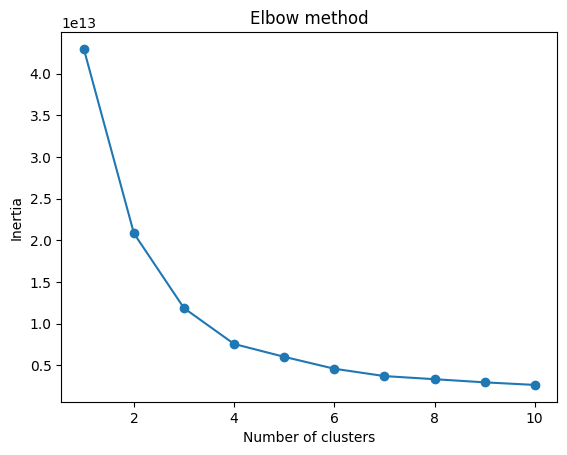

In [28]:
# Apply Kmeans
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

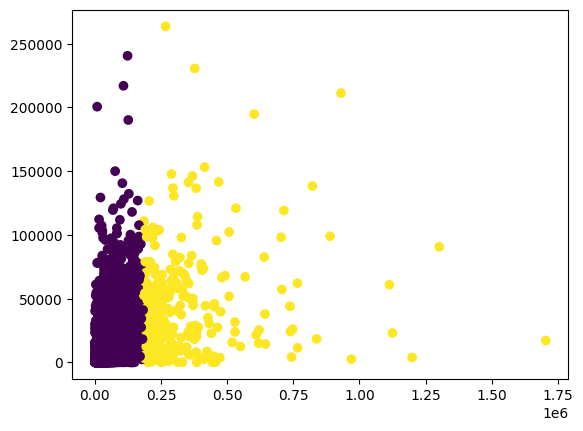

In [29]:
#Trying with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2)
y_kmeans = kmeans.fit_predict(df2)

# Access the data from the DataFrame using column names
plt.scatter(df2['Balance'], df2['Bonus_miles'], c=kmeans.labels_)
plt.show()

In [30]:
# converting numpy array into pandas series object
md=pd.Series(y_kmeans)
df2['clust']=md # creating a  new column and assigning it to new column
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [31]:
#corelration
df2.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,0.734907
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,0.076692
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,0.221030
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,-0.011070
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.004908
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,0.298896
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,0.230680
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,0.167623
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,0.195581
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121,0.188529


In [32]:
#centers, label and inertia
print(f"kmeans.cluster_centers_ : {kmeans.cluster_centers_}" )
print(f"kmeans.labels_ : {kmeans.labels_}" )
print(f"kmeans.inertia_ : {kmeans.inertia_}" )

kmeans.cluster_centers_ : [[5.13562868e+04 1.26292803e+02 1.96810251e+00 1.01499455e+00
  1.01254089e+00 1.49766412e+04 1.09364776e+01 3.89558615e+02
  1.15076336e+00 4.00161723e+03 3.50599782e-01]
 [3.20111326e+05 3.41607251e+02 3.07250755e+00 1.00906344e+00
  1.00906344e+00 4.11719637e+04 1.89758308e+01 1.24127492e+03
  3.84290030e+00 5.41446224e+03 5.89123867e-01]]
kmeans.labels_ : [0 0 0 ... 0 0 0]
kmeans.inertia_ : 20823632642041.953


In [33]:
#groupimg by cluster
df2.groupby(df2.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,51356.286805,126.292803,1.968103,1.014995,1.012541,14976.641221,10.936478,389.558615,1.150763,4001.617230,0.350600
1,320111.326284,341.607251,3.072508,1.009063,1.009063,41171.963746,18.975831,1241.274924,3.842900,5414.462236,0.589124


In [34]:
# Scores
from sklearn.metrics import silhouette_score,davies_bouldin_score
print("Original Dataset Clustering Results:")
silhouette_avg = silhouette_score(df2, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(df2, y_kmeans)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Original Dataset Clustering Results:
Silhouette Score: 0.7418962153746211
Davies-Bouldin Index: 0.6322390889983184


In [35]:
#copying dataset
df3=df.copy()
df3.drop(['ID#'], axis=1, inplace=True)
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
#normalizing data
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

df3 = norm_func(df3.iloc[:,0:])

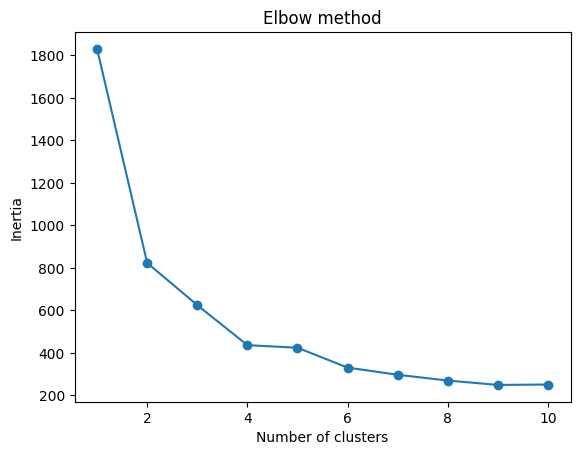

In [37]:
#applying kmeans
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans_3 = KMeans(n_clusters=i)
    kmeans_3.fit(df3)
    inertias.append(kmeans_3.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

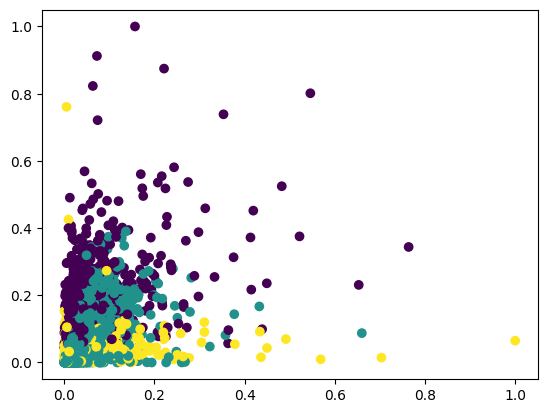

In [38]:
#clustering with 3
kmeanss= KMeans(n_clusters=3)
kmeanss.fit(df3)
y_kmeans_3 = kmeanss.fit_predict(df3)

# Access the data from the DataFrame using column names
plt.scatter(df3['Balance'], df3['Bonus_miles'], c=kmeanss.labels_)
plt.show()

In [39]:
# converting numpy array into pandas series object
md_3=pd.Series(y_kmeans_3)
df3['clust']=md_3 # creating a  new column and assigning it to new column
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [40]:
#corelation
df3.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,-0.087277
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,0.029087
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,-0.630123
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,0.063999
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.028135
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,-0.487107
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,-0.330249
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,0.052524
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,0.062223
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121,-0.090405


In [41]:
#centers, label and inertia
print(f"kmeans.cluster_centers_ : {kmeans_3.cluster_centers_}" )
print(f"kmeans.labels_ : {kmeans_3.labels_}" )
print(f"kmeans.inertia_ : {kmeans_3.inertia_}" )

kmeans.cluster_centers_ : [[ 1.10300047e-01  1.99610022e-02  9.96212121e-01 -1.99493200e-17
   2.52525253e-02  3.23277277e-01  2.71670190e-01  2.98605355e-02
   5.26967791e-02  7.05226244e-01  1.00000000e+00]
 [ 2.92823328e-02  8.06451613e-03  3.05299539e-02  9.79262673e-03
   2.88018433e-04  1.31485480e-02  8.03906334e-02  7.91232441e-03
   1.37379358e-02  6.71078504e-01  2.22044605e-15]
 [ 4.09158966e-02  2.08648237e-02  2.46045694e-02  1.40597540e-02
  -4.25007252e-17  2.74886692e-02  9.59864307e-02  1.84697659e-02
   3.25960805e-02  4.96763282e-01  1.00000000e+00]
 [ 1.94137515e-02  8.44382696e-03  1.76841085e-02  8.23643411e-03
   1.69573643e-03  1.23045313e-02  7.17842978e-02  6.90692719e-03
   1.13902296e-02  2.39980966e-01 -4.99600361e-16]
 [ 5.10142938e-02  9.58265260e-03  4.40355330e-01  5.07614213e-03
   5.07614213e-03  7.27441767e-02  1.99031992e-01  1.44496355e-02
   2.33694091e-02  7.31118085e-01  1.00000000e+00]
 [ 5.83388869e-02  8.16602172e-03  6.16297468e-01  1.582278

In [42]:
#groupimg by cluster
df3.groupby(df3.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0
1,0.035081,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0


In [43]:
#scores
from sklearn.metrics import silhouette_score,davies_bouldin_score
print("Original Dataset Clustering Results:")
silhouette_avg = silhouette_score(df3, y_kmeans_3)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(df3, y_kmeans_3)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Original Dataset Clustering Results:
Silhouette Score: 0.6756084865524566
Davies-Bouldin Index: 0.4777982856552751


# **DBSCAN**

In [44]:
# copying and dropping columns
dfd=df.copy()
dfd.drop(['ID#','Award?'], axis=1, inplace=True)

In [45]:
#standardization dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfd = scaler.fit_transform(dfd)

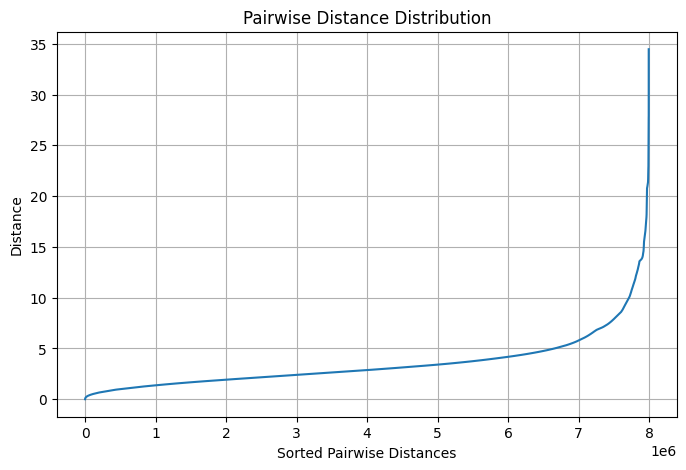

In [46]:
# Calculate pairwise distances
from scipy.spatial.distance import pdist, squareform

distances = pdist(dfd, metric='euclidean')  # Pairwise distances
sorted_distances = np.sort(distances)       # Sort distances for visualization

# Plot the distance distribution
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel('Sorted Pairwise Distances')
plt.ylabel('Distance')
plt.title('Pairwise Distance Distribution')
plt.grid()
plt.show()

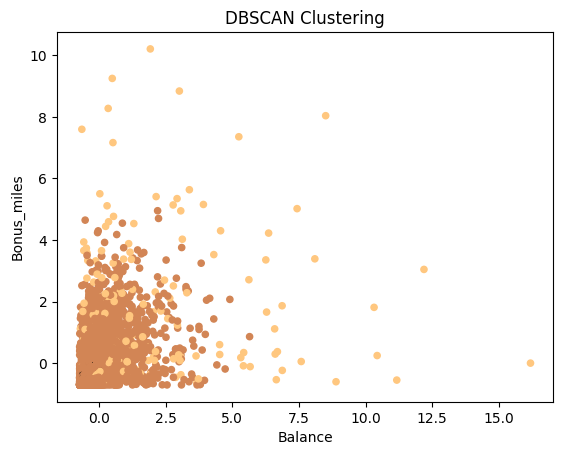

In [47]:
#applying dbscan
from sklearn.cluster import DBSCAN
db=DBSCAN(eps = 1.9, min_samples =10)
db.fit(dfd)
y_db=db.fit_predict(dfd)
y_db
# Assuming 'Balance' was the first column and 'Bonus_miles' the sixth before scaling:
plt.scatter(dfd[:, 0], dfd[:, 5], c=y_db, s=20, cmap=plt.cm.copper_r)
plt.xlabel('Balance')  # Continue using original labels for clarity
plt.ylabel('Bonus_miles')
plt.title('DBSCAN Clustering')
plt.show()

In [48]:
# Scores
print("Original Dataset Clustering Results:")
silhouette_avg = silhouette_score(dfd, y_db)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(dfd, y_db)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Original Dataset Clustering Results:
Silhouette Score: 0.5809838515665287
Davies-Bouldin Index: 1.2619894073858748


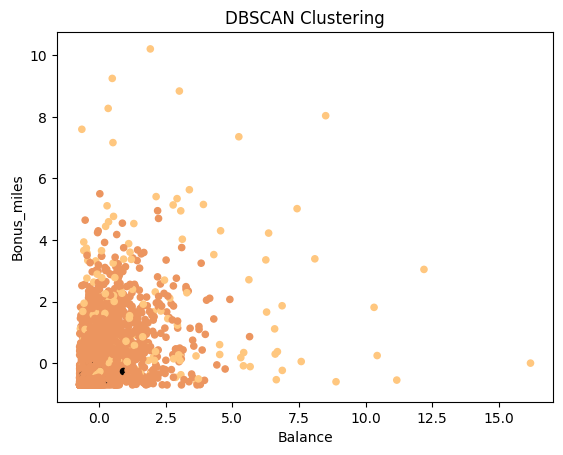

In [49]:
#applying db scan
from sklearn.cluster import DBSCAN
db=DBSCAN(eps = 1.9, min_samples =8)
db.fit(dfd)
y_db=db.fit_predict(dfd)
y_db
# Assuming 'Balance' was the first column and 'Bonus_miles' the sixth before scaling:
plt.scatter(dfd[:, 0], dfd[:, 5], c=y_db, s=20, cmap=plt.cm.copper_r)
plt.xlabel('Balance')  # Continue using original labels for clarity
plt.ylabel('Bonus_miles')
plt.title('DBSCAN Clustering')
plt.show()

In [50]:
#scores
print("Original Dataset Clustering Results:")
silhouette_avg = silhouette_score(dfd, y_db)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(dfd, y_db)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Original Dataset Clustering Results:
Silhouette Score: 0.5756062934854663
Davies-Bouldin Index: 1.1881175632467256


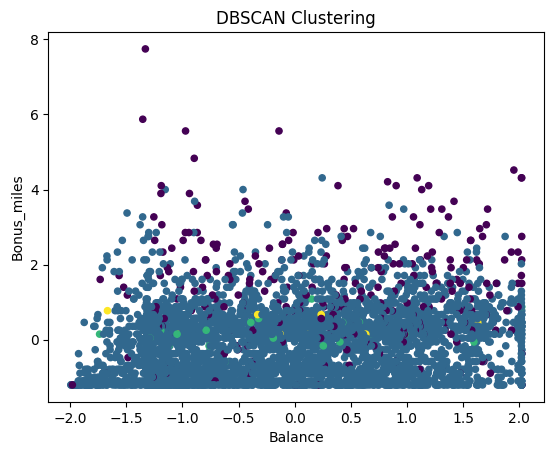

In [51]:
#Applying dbscan
from sklearn.cluster import DBSCAN
db=DBSCAN(eps = 1.5, min_samples =8)
db.fit(dfd)
y_db=db.fit_predict(dfd)
y_db
# Assuming 'Balance' was the first column and 'Bonus_miles' the sixth before scaling:
plt.scatter(dfd[:, 9], dfd[:, 6], c=y_db, s=20)
plt.xlabel('Balance')  # Continue using original labels for clarity
plt.ylabel('Bonus_miles')
plt.title('DBSCAN Clustering')
plt.show()

In [52]:
#score
print("Original Dataset Clustering Results:")
silhouette_avg = silhouette_score(dfd, y_db)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(dfd, y_db)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Original Dataset Clustering Results:
Silhouette Score: 0.5715528877867831
Davies-Bouldin Index: 1.2653794098839677
